In [103]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import missingno as msno
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [37]:
data=pd.read_csv('D:/DataSets/pulse_star/pulsar_stars.csv')
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [45]:
data.columns=['mean_ip','st_ip','krt_ip','skew_ip','mean_snr','st_snr','krt_snr','skew_snr','target']

In [46]:
data.shape

(17898, 9)

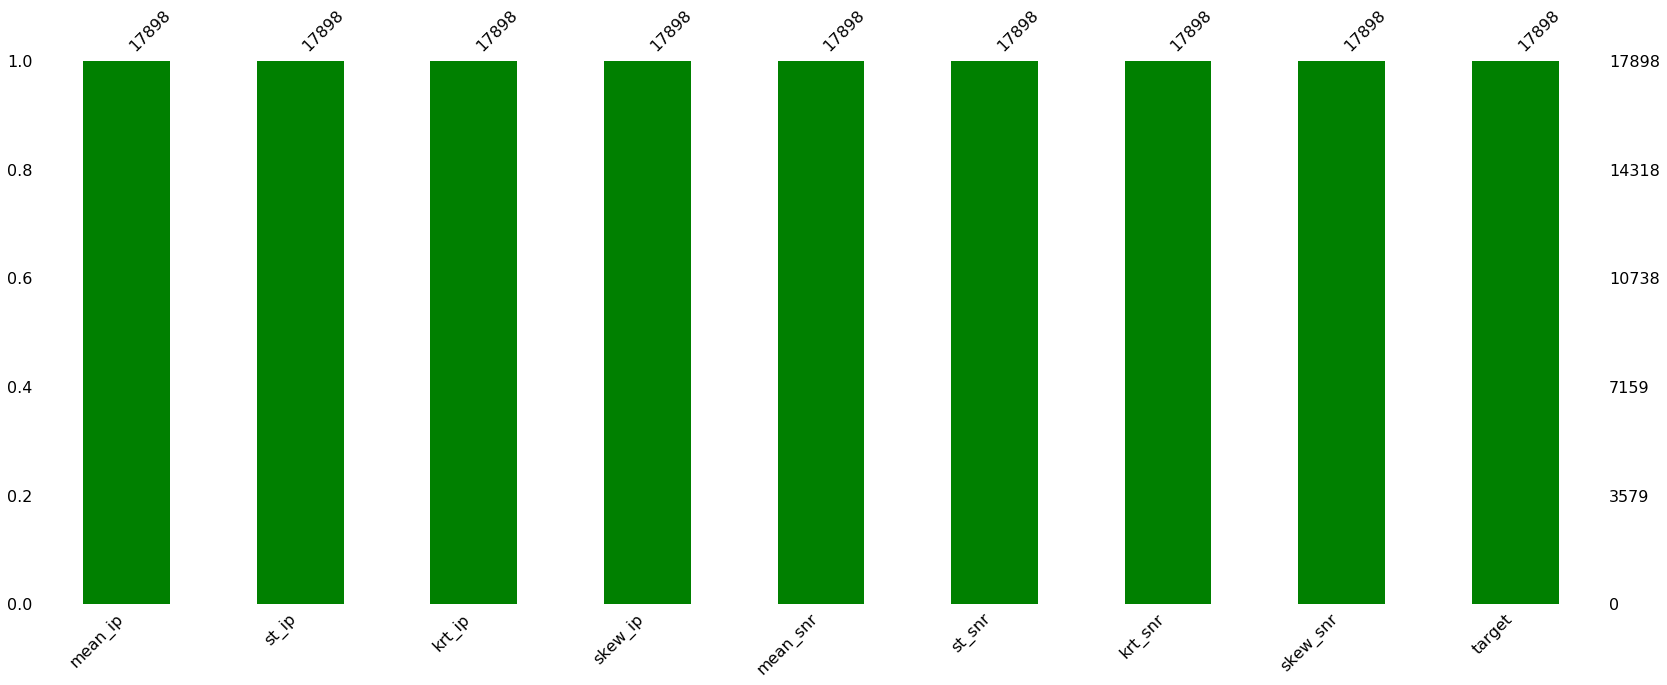

In [47]:
msno.bar(data.sample(17898),(28,10),color='green')

In [48]:
# No null values are present
data.skew()

mean_ip    -1.375188
st_ip       0.126641
krt_ip      3.638410
skew_ip     5.181293
mean_snr    3.683302
st_snr      1.894254
krt_snr     0.441501
skew_snr    2.734514
target      2.832353
dtype: float64

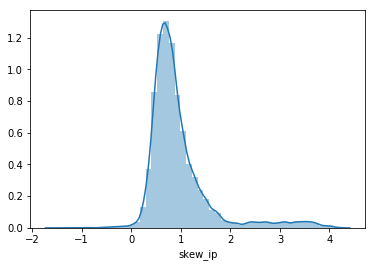

In [54]:
sns.distplot(np.log(data['skew_ip']+2))

In [51]:
data.head()

,mean_ip,st_ip,krt_ip,skew_ip,mean_snr,st_snr,krt_snr,skew_snr,target
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


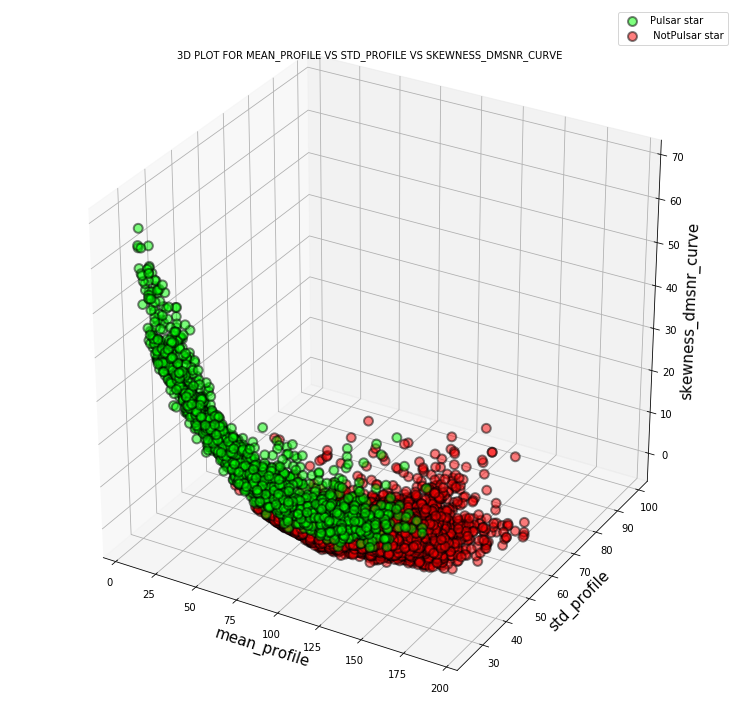

In [52]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(13,13))
ax  = fig.add_subplot(111,projection = "3d")

ax.scatter(data[data["target"] == 1][["mean_ip"]],data[data["target"] == 1][["st_ip"]],data[data["target"] == 1][["skew_ip"]],
           alpha=.5,s=80,linewidth=2,edgecolor="k",color="lime",label="Pulsar star")
ax.scatter(data[data["target"] == 0][["mean_ip"]],data[data["target"] == 0][["st_ip"]],data[data["target"] == 0][["skew_ip"]],
           alpha=.5,s=80,linewidth=2,edgecolor="k",color="r",label=" NotPulsar star")

ax.set_xlabel("mean_profile",fontsize=15)
ax.set_ylabel("std_profile",fontsize=15)
ax.set_zlabel("skewness_dmsnr_curve",fontsize=15)
plt.legend(loc="best")
fig.set_facecolor("w")
plt.title("3D PLOT FOR MEAN_PROFILE VS STD_PROFILE VS SKEWNESS_DMSNR_CURVE",fontsize=10)
plt.show()

In [55]:
data.columns

Index(['mean_ip', 'st_ip', 'krt_ip', 'skew_ip', 'mean_snr', 'st_snr',
       'krt_snr', 'skew_snr', 'target'],
      dtype='object')

Text(0.5, 1.0, 'Count for Target_Variable')

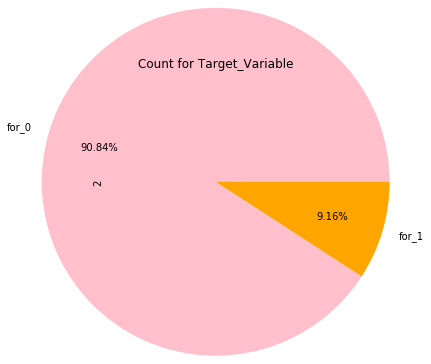

In [80]:
a=data[data['target']==0]['target'].count()
b=data[data['target']==1]['target'].count()
ab=pd.DataFrame({'for_0':a,'for_1':b},index=[1,2])#.plot(kind='pie','subplots=True')
ab.iloc[1].plot(kind='pie',autopct='%.2f%%',pctdistance=0.7,colors=['pink','orange'],radius=2)
plt.title('Count for Target_Variable')
#plt.ie(a,b)

In [86]:
y=data['target']
x=data.drop(['target'],axis=1)

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(len(x_train),len(x_test))

14318 3580


In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
prediction=lr.predict(x_test)

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [92]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
score=lr.score(x_test,y_test)
score

0.9829608938547486

In [96]:
confusion_matrix(y_test,prediction)

array([[3288,   18],
       [  43,  231]], dtype=int64)

In [97]:
from sklearn.tree  import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [98]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [99]:
accuracy_score(y_test,y_pred)

0.9715083798882681

In [104]:
rf=RandomForestClassifier(n_estimators=100,random_state=0)
# n_estimators indicates the number of trees in the forest
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9846368715083799

In [106]:

gb=GradientBoostingClassifier(n_estimators=100)
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
accuracy_score(y_test,y_pred)

0.982122905027933

In [109]:
from xgboost import XGBClassifier

In [111]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
accuracy_score(y_test,y_pred)

0.9843575418994414